<a href="https://colab.research.google.com/github/cyber-noob/Dockship.io-Ahalytix-challenge/blob/main/Copy_of_Analytix_hiring_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,5)})

In [98]:
data = pd.read_csv('/content/drive/MyDrive/Dockship_io/analytix/TRAIN.csv')

In [99]:
test = pd.read_csv('/content/drive/MyDrive/Dockship_io/analytix/TEST.csv')

In [100]:
data.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [101]:
data['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [103]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


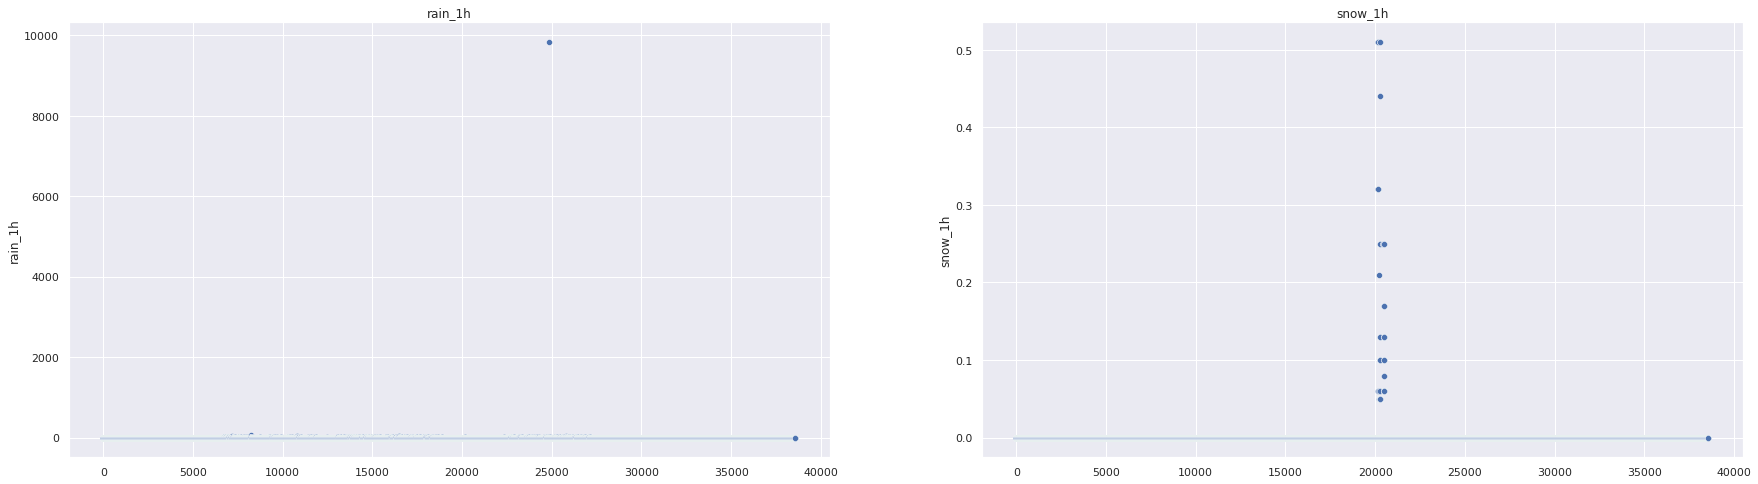

In [104]:
fig,ax = plt.subplots(1,2, figsize = (30,8))
sns.scatterplot(data = data['rain_1h'], ax = ax[0])
ax[0].set_title('rain_1h')
sns.scatterplot(data = data['snow_1h'], ax =ax[1])
ax[1].set_title('snow_1h')
plt.show()

From the above table the features 'rain_1h' and 'snow_1h' show clear signs of outliers which the scatterplots also confirm our hypothesis

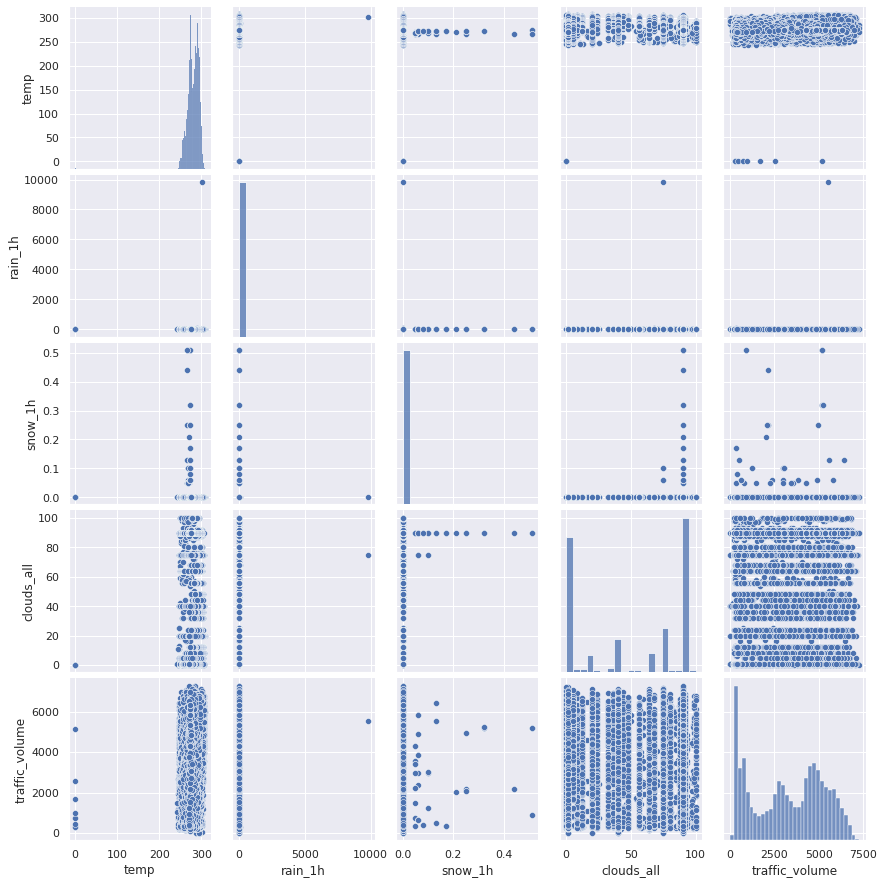

In [105]:
sns.pairplot(data = data)

In [106]:
import warnings
warnings.filterwarnings('ignore')

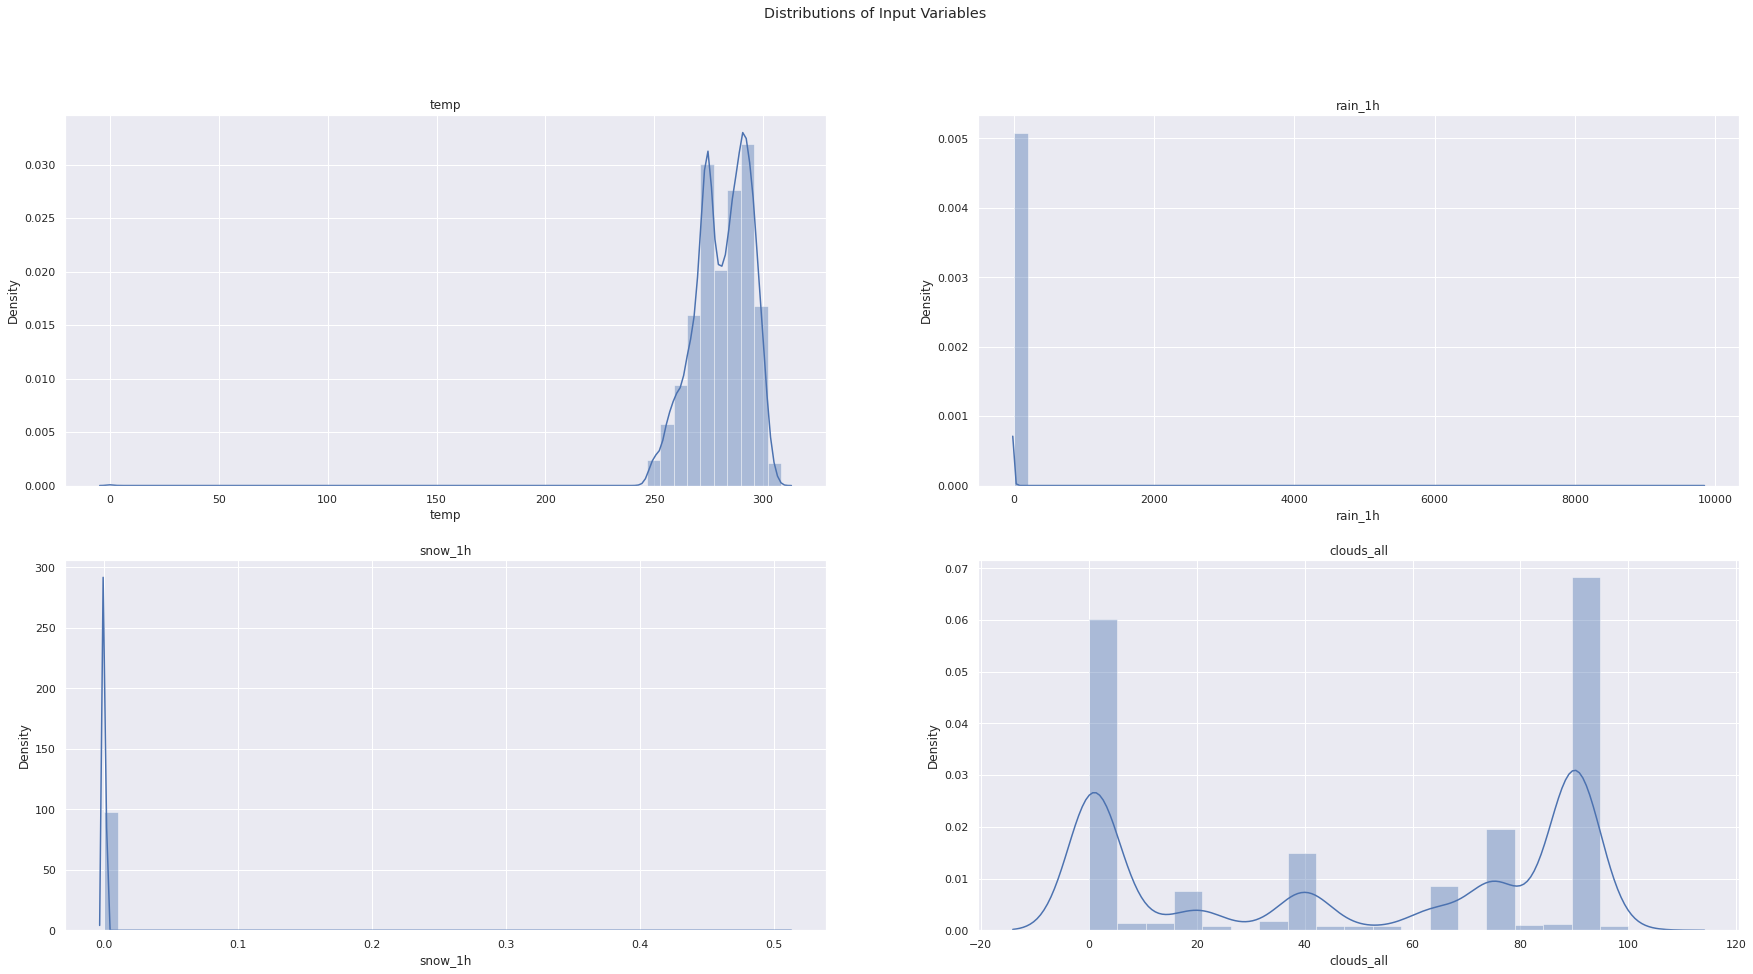

In [107]:
fig,ax = plt.subplots(2,2, figsize = (30,15))
fig.suptitle('Distributions of Input Variables')

#temp
sns.distplot(data['temp'], kde = True, ax = ax[0,0])
ax[0,0].set_title('temp')

#rain_1h
sns.distplot(data['rain_1h'], kde = True, ax = ax[0,1])
ax[0,1].set_title('rain_1h')

#snow_1h
sns.distplot(data['snow_1h'], kde = True, ax = ax[1,0])
ax[1,0].set_title('snow_1h')

#clouds_all
sns.distplot(data['clouds_all'], kde = True, ax = ax[1,1])
ax[1,1].set_title('clouds_all')

plt.show()

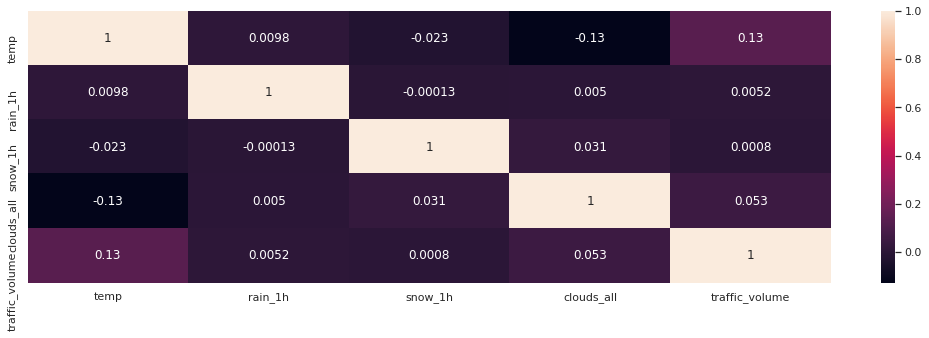

In [108]:
sns.set(rc = {'figure.figsize':(18,5)})
sns.heatmap(data.corr(),annot=True)

In [109]:
#convert Holidays columns into None -> 0 and Holidays -> 1
#This way holiday column will serve as a more generalised feature for the model
data.loc[data['holiday'] != 'None','holiday'] = 1
data.loc[data['holiday'] == 'None','holiday'] = 0
data['holiday'].value_counts()

0    38515
1       48
Name: holiday, dtype: int64

# Outlier Detection and Remediation

In [110]:
data['snow_1h'].value_counts(normalize = True)*100      #Percentage of each unique value in these specific columns

0.00    99.836631
0.05     0.036304
0.06     0.031118
0.10     0.015559
0.13     0.015559
0.51     0.015559
0.25     0.015559
0.32     0.012966
0.17     0.007779
0.08     0.005186
0.44     0.005186
0.21     0.002593
Name: snow_1h, dtype: float64

In [111]:
data['rain_1h'].value_counts(normalize = True)

0.00    0.928584
0.25    0.017608
0.51    0.006250
0.30    0.003086
0.76    0.002515
          ...   
3.12    0.000026
1.53    0.000026
2.34    0.000026
0.92    0.000026
2.13    0.000026
Name: rain_1h, Length: 353, dtype: float64

Since both the columns have more than 90% of its values as 0.0 it is safe to say that these columns wouldn't contribute much to the model andso we remove these columns from our training data

In [112]:
data.drop(['rain_1h','snow_1h'],axis=1,inplace=True)

**Checking temperature feature column**

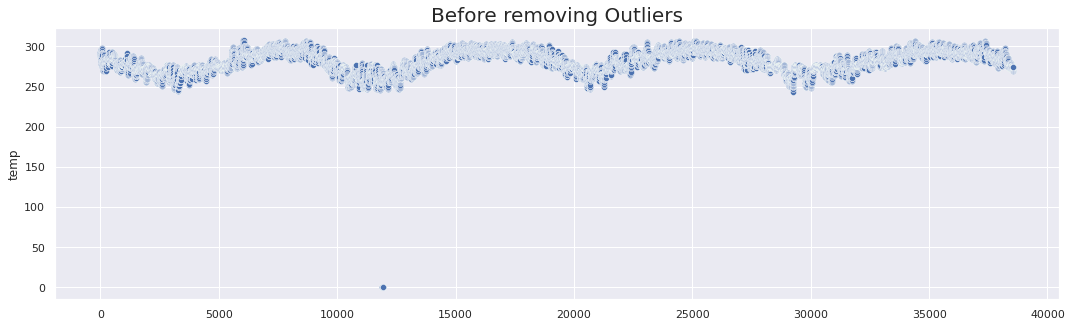

In [113]:
plt.title("Before removing Outliers", fontsize = 20)
sns.scatterplot(data = data['temp'])
plt.show()

In [114]:
from sklearn.ensemble import IsolationForest

In [115]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(data['temp'].values.reshape(-1,1))
mask = yhat!=-1

In [116]:
_mask = yhat==-1
_mask

array([False, False, False, ..., False, False, False])

In [117]:
np.array(np.unique(yhat, return_counts=True)).T

array([[   -1,  3854],
       [    1, 34709]])

In [118]:
temp = data.copy()
for i in (data.iloc[_mask,:].index):
  temp.at[i,'temp'] = (temp.iloc[i-1:i-400:-1]['temp'].sum()/len(temp.iloc[i-1:i-400:-1]['temp']) + 
                       temp.iloc[i+1:i+400:1]['temp'].sum()/len(temp.iloc[i+1:i+400:1]['temp']))/2

In [119]:
# temp = data.iloc[mask,:]
# temp = temp.reset_index().drop(['index'],axis=1)

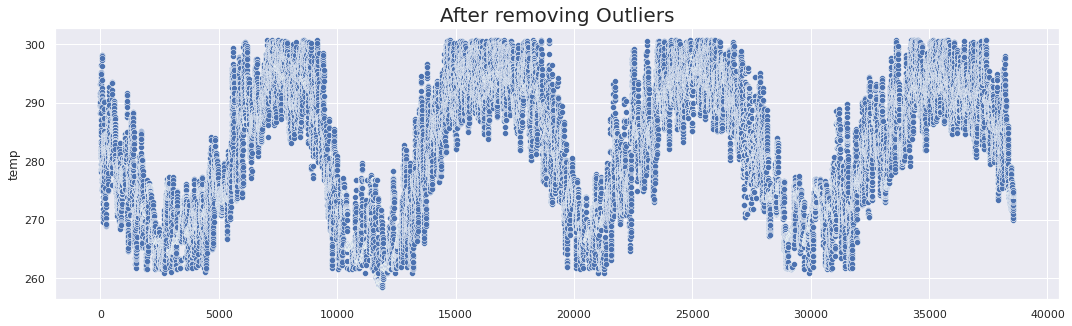

In [120]:
plt.title('After removing Outliers', fontsize = 20)
sns.scatterplot(data = temp['temp'])
plt.show()

In [121]:
data.describe()

,temp,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000
mean,281.351757,49.920364,3260.940409
std,13.216927,38.849106,1991.628329
min,0.000000,0.000000,0.000000
25%,272.858000,1.000000,1186.500000
50%,282.750000,64.000000,3378.000000
75%,291.540000,90.000000,4939.000000
max,308.240000,100.000000,7280.000000


In [122]:
temp.describe()

,temp,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000
mean,281.911995,49.920364,3260.940409
std,10.805280,38.849106,1991.628329
min,258.463010,0.000000,0.000000
25%,272.905000,1.000000,1186.500000
50%,282.750000,64.000000,3378.000000
75%,291.480000,90.000000,4939.000000
max,300.750000,100.000000,7280.000000


Comparing the above tables we see that there is an approximate 9% loss from out initial data which is tolerable.

**Checking clouds_all feature column**

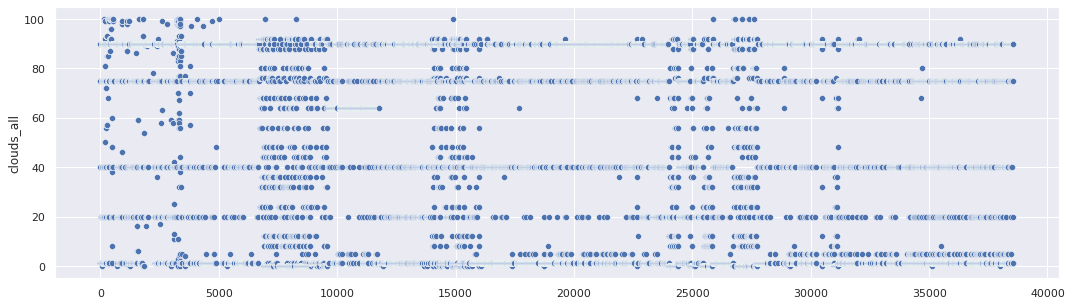

In [123]:
sns.scatterplot(data = temp['clouds_all'])
plt.show()

This looks fine

**Moving on let's check the distributions of these feature set**

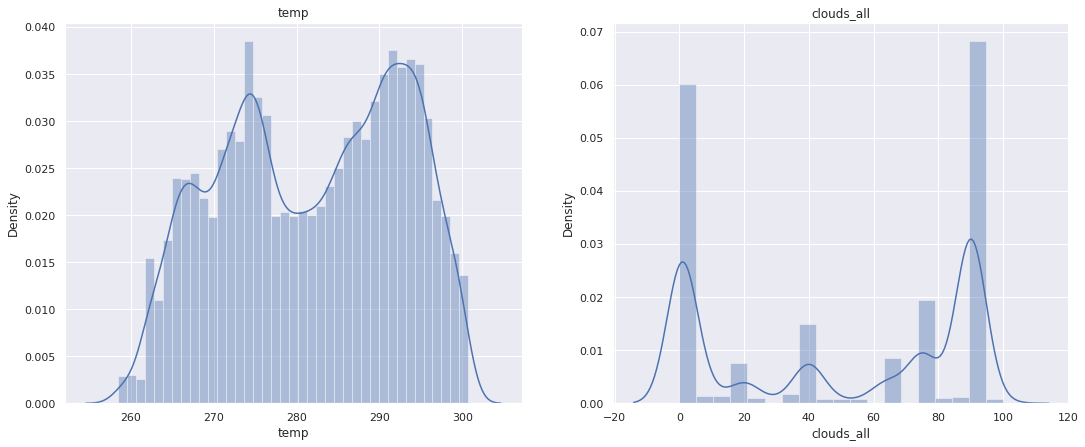

In [124]:
fig,ax = plt.subplots(1,2, figsize = (18,7))
sns.distplot(temp['temp'], ax = ax[0])
ax[0].set_title('temp')
sns.distplot(temp['clouds_all'], ax =ax[1])
ax[1].set_title('clouds_all')
plt.show()

'temp' feature somewhat looks like a normal distribution, so our focus will be on 'clouds_all'

In [125]:
#Adaptive binning using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = temp['clouds_all'].quantile(quantile_list)
quantiles

0.00      0.0
0.25      1.0
0.50     64.0
0.75     90.0
1.00    100.0
Name: clouds_all, dtype: float64

Text(0, 0.5, 'Frequency')

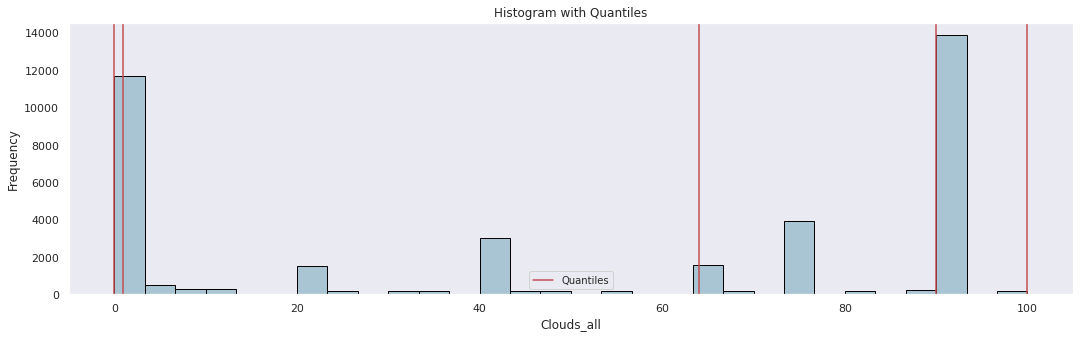

In [126]:
fig, ax = plt.subplots()
temp['clouds_all'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Clouds_all', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [127]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
temp['clouds_all_quantile_range'] = pd.qcut(
                                            temp['clouds_all'], 
                                            q=quantile_list)
temp['clouds_all_quantile_label'] = pd.qcut(
                                            temp['clouds_all'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

In [128]:
temp.head()

,date_time,holiday,temp,clouds_all,weather_main,weather_description,traffic_volume,clouds_all_quantile_range,clouds_all_quantile_label
0,2012-10-02 09:00:00,0,288.28,40,Clouds,scattered clouds,5545,"(1.0, 64.0]",25-50Q
1,2012-10-02 10:00:00,0,289.36,75,Clouds,broken clouds,4516,"(64.0, 90.0]",50-75Q
2,2012-10-02 11:00:00,0,289.58,90,Clouds,overcast clouds,4767,"(64.0, 90.0]",50-75Q
3,2012-10-02 12:00:00,0,290.13,90,Clouds,overcast clouds,5026,"(64.0, 90.0]",50-75Q
4,2012-10-02 13:00:00,0,291.14,75,Clouds,broken clouds,4918,"(64.0, 90.0]",50-75Q


In [129]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map quantile ranges
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(temp['clouds_all_quantile_label'])
temp['clouds_all_Label'] = gen_labels

In [130]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
clouds_all_arr = gen_ohe.fit_transform(
                              temp[['clouds_all_Label']]).toarray()
clouds_all_labels = list(gen_le.classes_)
clouds_all_features = pd.DataFrame(clouds_all_arr, 
                            columns=clouds_all_labels)

In [131]:
clouds_all_features.head()

,0-25Q,25-50Q,50-75Q,75-100Q
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [132]:
temp1 = pd.concat([temp,clouds_all_features],axis=1)

In [133]:
temp1.head()

,date_time,holiday,temp,clouds_all,weather_main,weather_description,traffic_volume,clouds_all_quantile_range,clouds_all_quantile_label,clouds_all_Label,0-25Q,25-50Q,50-75Q,75-100Q
0,2012-10-02 09:00:00,0,288.28,40,Clouds,scattered clouds,5545,"(1.0, 64.0]",25-50Q,1,0.0,1.0,0.0,0.0
1,2012-10-02 10:00:00,0,289.36,75,Clouds,broken clouds,4516,"(64.0, 90.0]",50-75Q,2,0.0,0.0,1.0,0.0
2,2012-10-02 11:00:00,0,289.58,90,Clouds,overcast clouds,4767,"(64.0, 90.0]",50-75Q,2,0.0,0.0,1.0,0.0
3,2012-10-02 12:00:00,0,290.13,90,Clouds,overcast clouds,5026,"(64.0, 90.0]",50-75Q,2,0.0,0.0,1.0,0.0
4,2012-10-02 13:00:00,0,291.14,75,Clouds,broken clouds,4918,"(64.0, 90.0]",50-75Q,2,0.0,0.0,1.0,0.0


In [134]:
temp = temp1.drop(['clouds_all_quantile_range','clouds_all_quantile_label','clouds_all_Label'],axis=1)

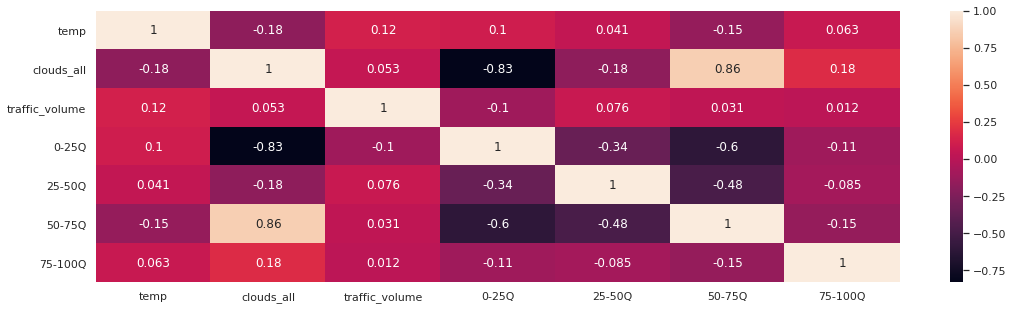

In [135]:
sns.heatmap(temp.corr(),annot=True)

In [136]:
def dt(temp):
  temp['date_time'] = pd.to_datetime(temp['date_time'], format='%Y-%m-%d %H:%M:%S')
  temp['date'] = temp['date_time'].dt.date
  temp['time'] = temp['date_time'].dt.time
  temp['date'] = pd.to_datetime(temp['date'])
  temp['date(d)'] = temp['date'].dt.day
  temp['date(m)'] = temp['date'].dt.month
  temp['date(y)'] = temp['date'].dt.day
  temp['time(h)'] = pd.to_datetime(temp['time'], format='%H:%M:%S').dt.hour
  return temp

In [141]:
temp = dt(temp)

In [142]:
temp.drop(['date_time','date','time'],axis=1,inplace=True)

In [143]:
temp.head()

,holiday,temp,clouds_all,weather_main,weather_description,traffic_volume,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h)
0,0,288.28,40,Clouds,scattered clouds,5545,0.0,1.0,0.0,0.0,2,10,2,9
1,0,289.36,75,Clouds,broken clouds,4516,0.0,0.0,1.0,0.0,2,10,2,10
2,0,289.58,90,Clouds,overcast clouds,4767,0.0,0.0,1.0,0.0,2,10,2,11
3,0,290.13,90,Clouds,overcast clouds,5026,0.0,0.0,1.0,0.0,2,10,2,12
4,0,291.14,75,Clouds,broken clouds,4918,0.0,0.0,1.0,0.0,2,10,2,13


Since 'weather_main' and 'weather_description' columns provide similar information, I am dropping the 'weather_description' column for now just for a base model purpose.

In [144]:
temp.drop(['weather_description'],axis=1,inplace=True)

In [145]:
set(temp['weather_main'].unique()) >=  set(test['weather_main'].unique()) #checking whether 'weather_main' column of test is a susbet of our training set

True

In [146]:
w_ohe = OneHotEncoder()

weather_arr = w_ohe.fit_transform(
                              temp[['weather_main']]).toarray()
weather_labels = list(w_ohe.categories_)
weather_features = pd.DataFrame(weather_arr, 
                            columns=weather_labels)

In [147]:
weather_features.head()

,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
temp = pd.concat([temp,weather_features],axis=1)
temp.drop(['weather_main'],axis=1,inplace=True)
temp.head()

,holiday,temp,clouds_all,traffic_volume,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0,288.28,40,5545,0.0,1.0,0.0,0.0,2,10,2,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,289.36,75,4516,0.0,0.0,1.0,0.0,2,10,2,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,289.58,90,4767,0.0,0.0,1.0,0.0,2,10,2,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,290.13,90,5026,0.0,0.0,1.0,0.0,2,10,2,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,291.14,75,4918,0.0,0.0,1.0,0.0,2,10,2,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(temp['traffic_volume'].values.reshape(-1,1))
mask = yhat!=-1

In [150]:
temp = temp.iloc[mask,:]
temp = temp.reset_index().drop(['index'],axis=1)
temp.head()

,holiday,temp,clouds_all,traffic_volume,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0,288.28,40,5545,0.0,1.0,0.0,0.0,2,10,2,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,289.36,75,4516,0.0,0.0,1.0,0.0,2,10,2,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,289.58,90,4767,0.0,0.0,1.0,0.0,2,10,2,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,290.13,90,5026,0.0,0.0,1.0,0.0,2,10,2,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,291.14,75,4918,0.0,0.0,1.0,0.0,2,10,2,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now our input data is almost ready. Next step, split Features and Target variables and scale down features to (0-1)

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
train_y = temp['traffic_volume']
train_x = temp.drop(['traffic_volume'],axis=1)

In [153]:
train_x.head()

,holiday,temp,clouds_all,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0,288.28,40,0.0,1.0,0.0,0.0,2,10,2,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,289.36,75,0.0,0.0,1.0,0.0,2,10,2,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,289.58,90,0.0,0.0,1.0,0.0,2,10,2,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,290.13,90,0.0,0.0,1.0,0.0,2,10,2,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,291.14,75,0.0,0.0,1.0,0.0,2,10,2,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_train_x = scaler_x.fit_transform(train_x)
scaled_train_y = scaler_y.fit_transform(train_y.values.reshape(-1,1))

In [194]:
scaled_train_x = pd.DataFrame(scaled_train_x, columns = train_x.columns)

In [195]:
scaled_train_x.head()

,holiday,temp,clouds_all,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0.0,0.705110,0.40,0.0,1.0,0.0,0.0,0.033333,0.818182,0.033333,0.391304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.730650,0.75,0.0,0.0,1.0,0.0,0.033333,0.818182,0.033333,0.434783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.735853,0.90,0.0,0.0,1.0,0.0,0.033333,0.818182,0.033333,0.478261,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.748859,0.90,0.0,0.0,1.0,0.0,0.033333,0.818182,0.033333,0.521739,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.772743,0.75,0.0,0.0,1.0,0.0,0.033333,0.818182,0.033333,0.565217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


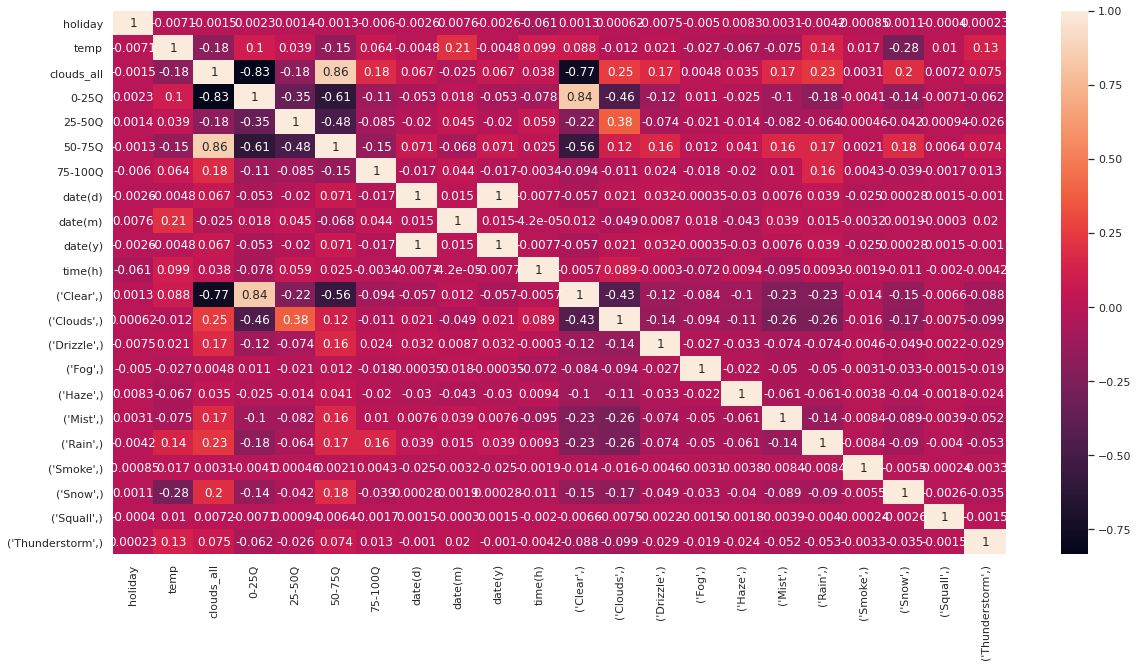

In [196]:
plt.figure(figsize=(20,10))
sns.heatmap(scaled_train_x.corr(),annot=True)

In [197]:
# scaled_train_x = scaled_train_x.values.reshape((scaled_train_x.shape[0], scaled_train_x.shape[1], 1))

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_train_x, scaled_train_y, 
                                                    test_size = 0.2, shuffle = True)

# Random Forest

In [243]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(warm_start=True, oob_score=True)

In [244]:
%%time
model.fit(X_train,Y_train)

CPU times: user 14.6 s, sys: 156 ms, total: 14.7 s
Wall time: 14.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=True)

In [245]:
y_pred = model.predict(X_test)

In [246]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.08599285117156977
Mean Squared Error: 0.018073961564919666
Root Mean Squared Error: 0.13443943456039847


# Let's make the submission file

In [247]:
test = pd.read_csv('/content/drive/MyDrive/Dockship_io/analytix/TEST.csv')

In [248]:
test.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist


In [249]:
def prep_data(data):
    #convert Holidays columns into None -> 0 and Holidays -> 1
    #This way holiday column will serve as a more generalised feature for the model
    data.loc[data['holiday'] != 'None','holiday'] = 1
    data.loc[data['holiday'] == 'None','holiday'] = 0
    data['holiday'].value_counts()
    data.drop(['rain_1h','snow_1h'],axis=1,inplace=True)
    temp = data.copy()
    #Adaptive binning using quantiles
    quantile_list = [0, .25, .5, .75, 1.]
    quantiles = temp['clouds_all'].quantile(quantile_list)
    
    quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
    temp['clouds_all_quantile_range'] = pd.qcut(
                                                temp['clouds_all'], 
                                                q=quantile_list)
    temp['clouds_all_quantile_label'] = pd.qcut(
                                                temp['clouds_all'], 
                                                q=quantile_list,       
                                                labels=quantile_labels)
            
    #Label Encoding                            
    gen_labels = gen_le.transform(temp['clouds_all_quantile_label'])
    temp['clouds_all_Label'] = gen_labels
    
    #One Hot Encoding
    clouds_all_arr = gen_ohe.transform(
                              temp[['clouds_all_Label']]).toarray()
    clouds_all_labels = list(gen_le.classes_)
    clouds_all_features = pd.DataFrame(clouds_all_arr, 
                                columns=clouds_all_labels)
    temp1 = pd.concat([temp,clouds_all_features],axis=1)
    temp = temp1.drop(['clouds_all_quantile_range','clouds_all_quantile_label','clouds_all_Label'],axis=1)
    temp = dt(temp)
    temp.drop(['date_time','date','time'],axis=1,inplace=True)
    temp.drop(['weather_description'],axis=1,inplace=True)
    
    #One Hot Encoding 'weather_main'
    weather_arr = w_ohe.transform(
                              temp[['weather_main']]).toarray()
    weather_labels = list(w_ohe.categories_)
    weather_features = pd.DataFrame(weather_arr, 
                                columns=weather_labels)
    
    temp = pd.concat([temp,weather_features],axis=1)
    temp.drop(['weather_main'],axis=1,inplace=True)
    return temp

In [250]:
test = prep_data(test)
test.head()

,holiday,temp,clouds_all,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0,274.75,90,0.0,0.0,1.0,0.0,1,11,1,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,274.75,90,0.0,0.0,1.0,0.0,1,11,1,20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,274.79,90,0.0,0.0,1.0,0.0,1,11,1,21,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,274.79,90,0.0,0.0,1.0,0.0,1,11,1,21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,275.08,90,0.0,0.0,1.0,0.0,1,11,1,22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [251]:
#Scaling the data
scaled_test = scaler_x.transform(test)

In [252]:
scaled_test = pd.DataFrame(scaled_test, columns = test.columns)
scaled_test.head()

,holiday,temp,clouds_all,0-25Q,25-50Q,50-75Q,75-100Q,date(d),date(m),date(y),time(h),"(Clear,)","(Clouds,)","(Drizzle,)","(Fog,)","(Haze,)","(Mist,)","(Rain,)","(Smoke,)","(Snow,)","(Squall,)","(Thunderstorm,)"
0,0.0,0.385154,0.9,0.0,0.0,1.0,0.0,0.0,0.909091,0.0,0.869565,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.385154,0.9,0.0,0.0,1.0,0.0,0.0,0.909091,0.0,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.386100,0.9,0.0,0.0,1.0,0.0,0.0,0.909091,0.0,0.913043,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.386100,0.9,0.0,0.0,1.0,0.0,0.0,0.909091,0.0,0.913043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.392958,0.9,0.0,0.0,1.0,0.0,0.0,0.909091,0.0,0.956522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [253]:
# test = scaled_test.values.reshape((test.shape[0], test.shape[1], 1))

In [254]:
test.shape

(9641, 22)

In [255]:
predictions = model.predict(np.asarray(scaled_test).astype('float32'))

In [256]:
predictions = scaler_y.inverse_transform(predictions.reshape(-1,1))

In [257]:
print('Min: ',data['traffic_volume'].min(),'\nMax: ',data['traffic_volume'].max()) #Actual Data

Min:  0 
Max:  7280


In [258]:
print('Min: ',predictions.min(),'\nMax: ',predictions.max())  #Predicted Data

Min:  300.91785714285714 
Max:  5824.8114285714255


In [259]:
output = pd.DataFrame(data = predictions,columns = ['Value'])

In [260]:
output = output.reset_index().rename(columns = {'index':'Index'})
output.head()

,Index,Value
0,0,2622.94
1,1,2672.39
2,2,2614.38
3,3,2712.07
4,4,1967.96


In [261]:
output.to_csv('/content/drive/MyDrive/Dockship_io/analytix/output.csv',index=False,header=True)

In [262]:
output.describe()

,Index,Value
count,9641.000000,9641.000000
mean,4820.000000,3164.562650
std,2783.261306,1680.444278
min,0.000000,300.917857
25%,2410.000000,1637.741095
50%,4820.000000,3543.680000
75%,7230.000000,4655.324667
max,9640.000000,5824.811429


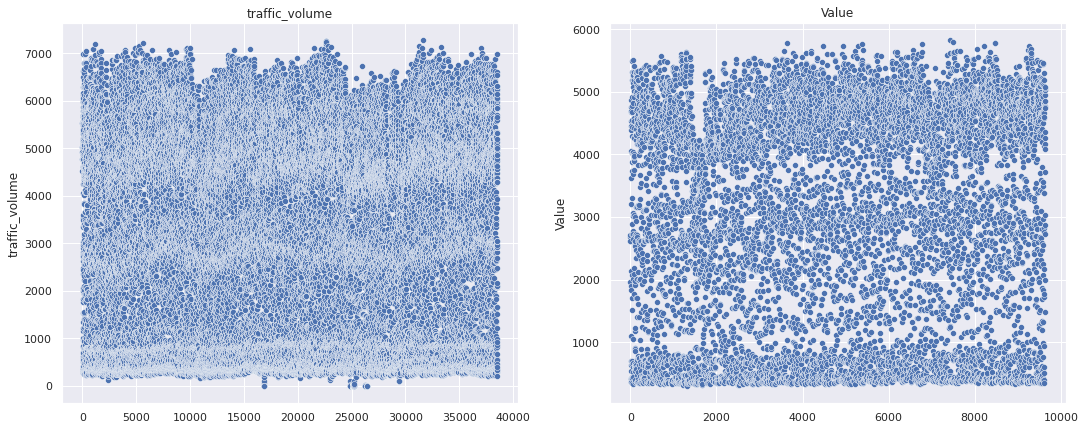

In [263]:
fig,ax = plt.subplots(1,2, figsize = (18,7))
sns.scatterplot(data = data['traffic_volume'], ax = ax[0])
ax[0].set_title('traffic_volume')
sns.scatterplot(data = output['Value'], ax =ax[1])
ax[1].set_title('Value')
plt.show()

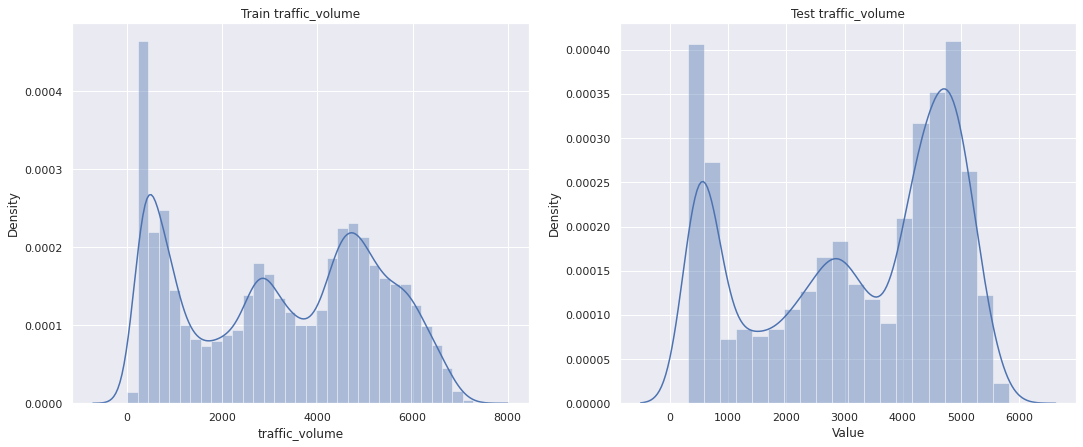

In [264]:
fig,ax = plt.subplots(1,2, figsize = (18,7))
sns.distplot(data['traffic_volume'], ax = ax[0])
ax[0].set_title('Train traffic_volume')
sns.distplot(output['Value'], ax =ax[1])
ax[1].set_title('Test traffic_volume')
plt.show()

**End Notes**

Both the Training and Predicted Test set distribution looks similar which suggests that our model has worked as expected.